## qiskitの使い方と単一の量子ビット

qiskitを利用して、量子アルゴリズムについて自分なりに勉強していこうと思います。
個人的な勉強の記録なので、説明などを大幅に省いている可能性があります。

qiskitのウェブサイト通りに勉強を進めています。

- https://qiskit.org/textbook/ja/preface.html 

### github
- jupyter notebook形式のファイルは[こちら](https://github.com/hiroshi0530/wa-src/blob/master/rec/qiskit/base/base_nb.ipynb)

### google colaboratory
- google colaboratory で実行する場合は[こちら](https://colab.research.google.com/github/hiroshi0530/wa-src/blob/master/rec/qiskit/base/base_nb.ipynb)

### 筆者の環境

In [8]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.14.6
BuildVersion:	18G103


In [9]:
!python -V

Python 3.8.5


基本的なライブラリをインポートしそのバージョンを確認しておきます。

In [21]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd

print('matplotlib version :', matplotlib.__version__)
print('scipy version :', scipy.__version__)
print('numpy version :', np.__version__)
print('pandas version :', pd.__version__)

matplotlib version : 3.3.2
scipy version : 1.5.2
numpy version : 1.19.2
pandas version : 1.1.3


In [135]:
import qiskit
import json

dict(qiskit.__qiskit_version__)

{'qiskit-terra': '0.17.4',
 'qiskit-aer': '0.8.2',
 'qiskit-ignis': '0.6.0',
 'qiskit-ibmq-provider': '0.13.1',
 'qiskit-aqua': '0.9.1',
 'qiskit': '0.26.2',
 'qiskit-nature': None,
 'qiskit-finance': None,
 'qiskit-optimization': None,
 'qiskit-machine-learning': None}

## Qiskitの文法の基礎

基礎から手を動かして実行し、操作を覚えていきます。

- https://qiskit.org/textbook/ja/ch-appendix/qiskit.html

In [173]:
qc = QuantumCircuit()
qr = QuantumRegister(2, 'qreg')

In [174]:
qc.add_register(qr)
qc.qregs

[QuantumRegister(2, 'qreg')]

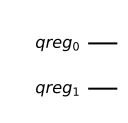

In [175]:
qc.draw(output='mpl')

In [176]:
# 一つ目の量子ビットにアダマールゲートを適用
qc.h(qr[0])

# qr0とqr1にCNOTゲートを適用
qc.cx(qr[0], qr[1]);

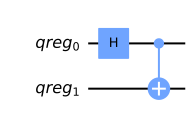

In [177]:
qc.draw(output='mpl')

In [178]:
# バックエンドシミュレータの準備
vector_sim = Aer.get_backend('statevector_simulator')

In [179]:
# バックエンドの準備
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [180]:
# シミュレータの実行
job = execute(qc, vector_sim)

In [182]:
job.result().get_statevector()

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

ベル状態を取得できました。
$$
\frac{|00\rangle+|11\rangle}{\sqrt{2}}
$$

## 測定

測定するには、量子ビットの他に、古典レジスタが必要になります。

In [183]:
cr = ClassicalRegister(2,'creg')
qc.add_register(cr)

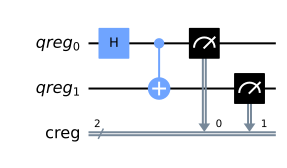

In [184]:
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])

qc.draw(output='mpl')

確率振幅に基づいた統計値を得るために、測定回数を指定する。

In [185]:
emulator = Aer.get_backend('qasm_simulator')
job = execute(qc, emulator, shots=8192)

In [186]:
hist = job.result().get_counts()
print(hist)

{'00': 4006, '11': 4186}


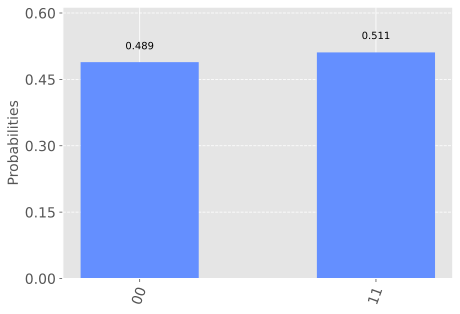

In [187]:
# ヒストグラムの表示
from qiskit.visualization import plot_histogram

plot_histogram(hist)

In [188]:
# 結果のリストの取得
job = execute(qc, emulator, shots=10, memory=True)
samples = job.result().get_memory()
print(samples)

['11', '11', '11', '00', '00', '11', '11', '00', '11', '00']


### ビットの表記

ビットには右から左にラベルがついている。

In [189]:
qubit = QuantumRegister(8)
bit = ClassicalRegister(8)
circuit = QuantumCircuit(qubit,bit)

circuit.x(qubit[7])
circuit.measure(qubit,bit) # this is a way to do all the qc.measure(qr8[j],cr8[j]) at once

execute(circuit, emulator, shots=8192).result().get_counts()

{'10000000': 8192}

以下の様なバイナリ表現を表している。

$$
b_{n-1} b_{n-2} \ldots b_{1} b_{0}=\sum_{j} b_{j} 2^{j}
$$

### 簡略表記

In [190]:
# 古典レジスタを持たない単一量子レジスタのみの回路

qc = QuantumCircuit(3)

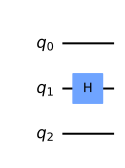

In [191]:
# 数字を指定することで操作可能

qc.h(1)
qc.draw(output='mpl')

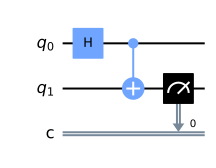

In [192]:
# 古典レジスタも同時に定義するには、二つ引数を設定する

qc = QuantumCircuit(2,1)

qc.h(0)
qc.cx(0,1)
qc.measure(1,0)

qc.draw(output='mpl')

## 1量子ビット

In [193]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

backend = Aer.get_backend('statevector_simulator')

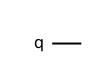

In [212]:
qc = QuantumCircuit(1)
qc.draw('mpl')

In [221]:
result = execute(qc, backend).result()

In [222]:
out_state = result.get_statevector()

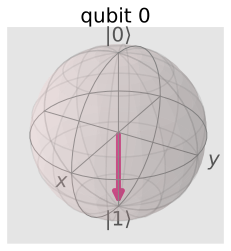

In [223]:
plot_bloch_multivector(out_state)

In [224]:
## 状態ベクトルの表示
out_state

array([0.+0.j, 1.+0.j])

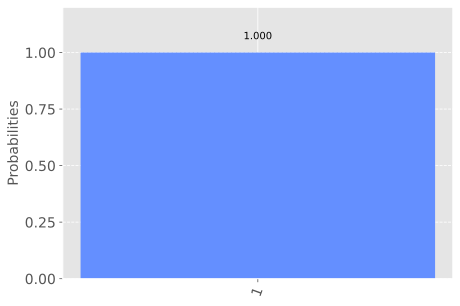

In [225]:
counts = result.get_counts()
plot_histogram(counts)

### 初期状態の設定

initial_state で初期状態を設定可能

$$
|q\rangle=|1\rangle
$$

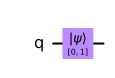

In [249]:
qc = QuantumCircuit(1)
initial_state = [0,1]
qc.initialize(initial_state, 0)
qc.draw('mpl')

In [250]:
result = execute(qc,backend).result()

In [251]:
out_state = result.get_statevector()

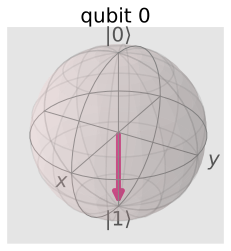

In [252]:
plot_bloch_multivector(out_state)

In [253]:
out_state

array([0.+0.j, 1.+0.j])

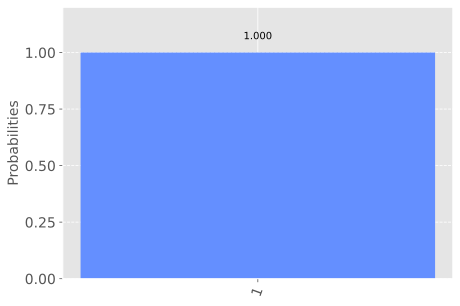

In [254]:
counts = result.get_counts()
plot_histogram(counts)

### 初期状態の設定 2

initial_state で初期状態を設定可能

$$
\left|q\right\rangle=\frac{1}{\sqrt{2}}|0\rangle+\frac{i}{\sqrt{2}}|1\rangle
$$

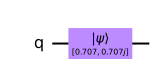

In [243]:
qc = QuantumCircuit(1)
initial_state = [1/sqrt(2), complex(0, 1/sqrt(2))]
qc.initialize(initial_state, 0)
qc.draw('mpl')

In [244]:
result = execute(qc,backend).result()

In [245]:
out_state = result.get_statevector()

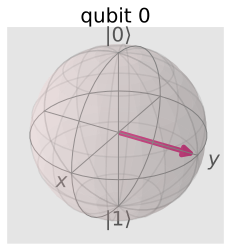

In [246]:
plot_bloch_multivector(out_state)

In [247]:
out_state

array([0.70710678+0.j        , 0.        +0.70710678j])

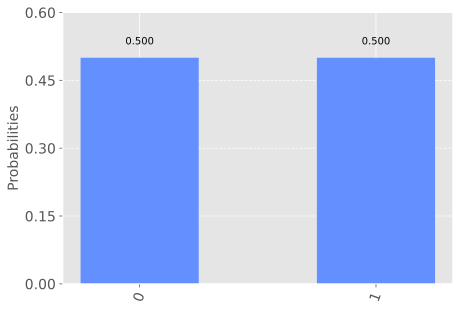

In [248]:
counts = result.get_counts()
plot_histogram(counts)

とりあえず、量子回路の表示、ブロッホ球を用いた表示、状態ベクトルの表示、測定など一通り出来ました。

## 単一の量子ビットの操作

単一の量子ビットは以下の様に表現できます。$\theta$、$\phi$は実数です。

$$
|q\rangle=\cos \left(\frac{\theta}{2}\right)|0\rangle+e^{i \phi} \sin \left(\frac{\theta}{2}\right)|1\rangle
$$


### 古典コンピュータのゲート

代表的な論理回路です。NOT回路以外は、二入力一出力の回路になります。
これらに相当する回路を量子回路でも実装する事になります。

![svg](base_nb_files_local/logic_circuit.svg)

#### AND回路

$$
\begin{array}{|c|c||c|}
\hline A & B & Z \\
\hline 0 & 0 & 0 \\
\hline 0 & 1 & 0 \\
\hline 1 & 0 & 0 \\
\hline 1 & 1 & 1 \\
\hline
\end{array}
$$

#### OR回路

$$
\begin{array}{|c|c||c|}
\hline A & B & Z \\
\hline 0 & 0 & 0 \\
\hline 0 & 1 & 1 \\
\hline 1 & 0 & 1 \\
\hline 1 & 1 & 1 \\
\hline
\end{array}
$$


#### NOT回路

$$
\begin{array}{|c||c|}
\hline A & Z \\
\hline 0 & 1 \\
\hline 1 & 0 \\
\hline
\end{array}
$$


#### NAND回路

$$
\begin{array}{|c|c||c|}
\hline A & B & Z \\
\hline 0 & 0 & 1 \\
\hline 0 & 1 & 1 \\
\hline 1 & 0 & 1 \\
\hline 1 & 1 & 0 \\
\hline
\end{array}
$$


#### NOR回路

$$
\begin{array}{|c|c||c|}
\hline A & B & Z \\
\hline 0 & 0 & 1 \\
\hline 0 & 1 & 0 \\
\hline 1 & 0 & 0 \\
\hline 1 & 1 & 0 \\
\hline
\end{array}
$$

#### XOR回路

$$
\begin{array}{|c|c||c|}
\hline A & B & Z \\
\hline 0 & 0 & 0 \\
\hline 0 & 1 & 1 \\
\hline 1 & 0 & 1 \\
\hline 1 & 1 & 0 \\
\hline
\end{array}
$$

## パウリゲート

パウリゲートは古典ゲートのNOT回路に相当する物で、ただ、NOTとは言ってもX、Y、Z各軸に対してのNOTが存在します。
NOTとは言っても、各軸に対して$\pi$だけ回転させたビットになります。

### Xゲート

$$
X=\left(\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right)=|0\rangle\langle 1|+| 1\rangle\langle 0|
$$


$$
X|0\rangle=\left(\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right)\left(\begin{array}{l}
1 \\
0
\end{array}\right)=\left(\begin{array}{l}
0 \\
1
\end{array}\right)=|1\rangle
$$

$$
X|1\rangle=\left(\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right)\left(\begin{array}{l}
0 \\
1
\end{array}\right)=\left(\begin{array}{l}
1 \\
0
\end{array}\right)=|0\rangle
$$

### Yゲート

$$
Y=\left(\begin{array}{cc}
0 & -i \\
i & 0
\end{array}\right)=i|0\rangle\langle 1|-i| 1\rangle\langle 0|
$$


$$
Y|1\rangle=\left(\begin{array}{ll}
0 & -i \\
i & 0
\end{array}\right)\left(\begin{array}{l}
1 \\
0
\end{array}\right)=i\left(\begin{array}{l}
0 \\
1
\end{array}\right)=i|0\rangle
$$

$$
Y|0\rangle=\left(\begin{array}{ll}
0 & -i \\
i & 0
\end{array}\right)\left(\begin{array}{l}
0 \\
1
\end{array}\right)=-i\left(\begin{array}{l}
1 \\
0
\end{array}\right)=-i|1\rangle
$$

### Zゲート

$$
Z=\left(\begin{array}{cc}
1 & 0 \\
0 & -1
\end{array}\right)=|0\rangle\langle 0|-| 1\rangle\langle 1|
$$

$$
Z|1\rangle=\left(\begin{array}{ll}
1 & 0 \\
0 & -1
\end{array}\right)\left(\begin{array}{l}
1 \\
0
\end{array}\right)=\left(\begin{array}{l}
1 \\
0
\end{array}\right)=|1\rangle
$$

$$
Z|0\rangle=\left(\begin{array}{ll}
1 & 0 \\
0 & -1
\end{array}\right)\left(\begin{array}{l}
0 \\
1
\end{array}\right)=\left(\begin{array}{l}
0 \\
-1
\end{array}\right)=|0\rangle
$$

## アダマールゲート

xz平面において、$z=x$の直線を中心として$\pi$だけ回転させるゲートになります。

$$
H=\frac{1}{\sqrt{2}}\left(\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right)
$$


ブロッホベクトルで結果を見てみます。

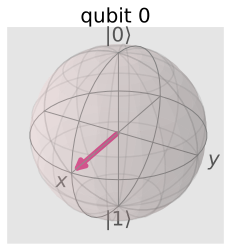

In [277]:
qc = QuantumCircuit(1)
qc.h(0)
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)


$|0\rangle$,$|1\rangle$ にアダマールゲートを適用したものをそれぞれ、$|+\rangle$、$|-\rangle$と書きます。
これらはそれぞれY基底と言われる正規直交基底になります。

$$
\begin{aligned}
&H|0\rangle=|+\rangle \\
&H|1\rangle=|-\rangle
\end{aligned}
$$

## R_{\phi}ゲート

$R_{\phi}$ゲートは、Z軸を中心に$\phi$だけ回転させるゲートです。
行列で表すと以下の様になります。

$$
R_{\phi}=\left(\begin{array}{cc}
1 & 0 \\
0 & e^{i \phi}
\end{array}\right)
$$

$$
\cos \frac{\theta}{2}|0\rangle+e^{i \varphi} \sin \frac{\theta}{2}|1\rangle \\
$$
の量子ビットに対して、上記の$R_{\phi}$を適用させます。

$$
\begin{aligned}
& R_{\phi} \left(\cos \frac{\theta}{2}|0\rangle+e^{i \varphi} \sin \frac{\theta}{2}|1\rangle\right) \\
=&\left.\left(\begin{array}{ll}
1 & 0 \\
0 & e^{i\phi}
\end{array}\right)\left(\cos \frac{\theta}{2} \left(\begin{array}{l}
1 \\
0
\end{array}\right)\right)+e^{i \varphi} \sin \frac{\theta}{2}\left(\begin{array}{l}
0 \\
1
\end{array}\right)\right) \\
=& \cos \frac{\theta}{2}\left(\begin{array}{l}
1 \\
0
\end{array}\right)+e^{i(\varphi+\phi)} \sin \frac{\theta}{2}\left(\begin{array}{l}
0 \\
1
\end{array}\right)
\end{aligned}
$$

となり、確かにZ軸に対して、$\phi$だけ回転していることが分かります。

## 実際に見てみる

以下の初期状態から、各ゲート演算子を作用させ、ブロッホベクトルがどのように変化するか見てみます。

$$
\left|q_0\right\rangle=\frac{1}{\sqrt{2}}|0\rangle+\frac{i}{\sqrt{2}}|1\rangle
$$

### 初期状態

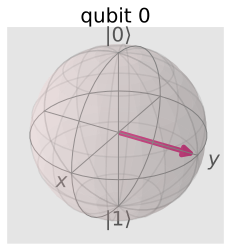

In [284]:
qc = QuantumCircuit(1)
initial_state = [1/sqrt(2), complex(0, 1/sqrt(2))]
qc.initialize(initial_state, 0)
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

### Xゲート

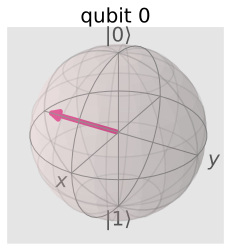

In [279]:
qc = QuantumCircuit(1)
initial_state = [1/sqrt(2), complex(0, 1/sqrt(2))]
qc.initialize(initial_state, 0)
qc.x(0)
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

### Yゲート

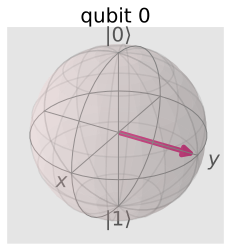

In [280]:
qc = QuantumCircuit(1)
initial_state = [1/sqrt(2), complex(0, 1/sqrt(2))]
qc.initialize(initial_state, 0)
qc.y(0)
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

Y軸に対しては何も変化がありません。固有ベクトルとなっています。

### Zゲート

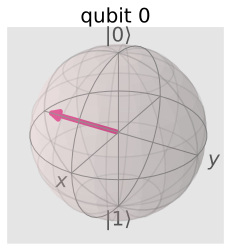

In [282]:
qc = QuantumCircuit(1)
initial_state = [1/sqrt(2), complex(0, 1/sqrt(2))]
qc.initialize(initial_state, 0)
qc.z(0)
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

### Hゲート

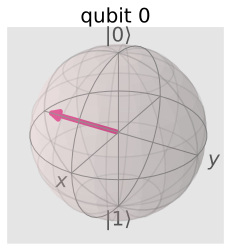

In [283]:
qc = QuantumCircuit(1)
initial_state = [1/sqrt(2), complex(0, 1/sqrt(2))]
qc.initialize(initial_state, 0)
qc.h(0)
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

### R_{\phi}ゲート

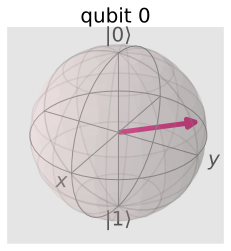

In [285]:
qc = QuantumCircuit(1)
initial_state = [1/sqrt(2), complex(0, 1/sqrt(2))]
qc.initialize(initial_state, 0)
qc.rz(pi/4, 0)
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

ちゃんとZ軸に$\displaystyle \frac{\pi}{4}$だけ回転されていることが分かります。

## まとめ

とりあえず、基本的な使い方と1量子ビットの操作をqiskitを利用して理解してみました。
いやーとても便利です。視覚的にもわかりやすいし。
さらに勉強を進めて理解を深めようと思います。